In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

In [4]:
df = pd.read_csv('data/flight_fare.csv')

In [93]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [94]:
new_df = df.copy()

In [95]:
new_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


## understanding raw data.

In [96]:
df.shape

(10683, 11)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [98]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [99]:
# removing Trujet values in whole dataset as Trujet value is absent in test_set.csv.

df = df[df['Airline'] != 'Trujet']

In [100]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [101]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [102]:
# As there is only one row with Nan value, we will drop it.


In [103]:
df.dropna(inplace = True)

In [104]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### - Now we will move towards data cleaning and preprocessing along EDA 
**Steps** :

- We will handle datetime column such as date of journey, Dep_time, arrival_time, duration.
- we will convert date of journey column to Journey_date, Journey_month.
- We will perform Categorical encoding to Airline, source, destination, total stops
- We will see what we can do after doing this much.   

### We will handle datetime column such as date of journey, Dep_time, arrival_time, duration.

In [105]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [106]:
df1 = df[['Date_of_Journey', 'Dep_Time', 'Arrival_Time', "Duration"]]

In [107]:
df1.head(2)

,Date_of_Journey,Dep_Time,Arrival_Time,Duration
0,24/03/2019,22:20,01:10 22 Mar,2h 50m
1,1/05/2019,05:50,13:15,7h 25m


In [108]:
df1['journey_date'] = pd.to_datetime(df['Date_of_Journey'], format ="%d/%m/%Y").dt.day

C:\Users\nancy\AppData\Local\Temp\ipykernel_12880\3331651916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['journey_date'] = pd.to_datetime(df['Date_of_Journey'], format ="%d/%m/%Y").dt.day


In [109]:
df1['journey_month'] = pd.to_datetime(df['Date_of_Journey'], format ="%d/%m/%Y").dt.month

C:\Users\nancy\AppData\Local\Temp\ipykernel_12880\3353933077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['journey_month'] = pd.to_datetime(df['Date_of_Journey'], format ="%d/%m/%Y").dt.month


In [110]:
df1.head(2)

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,journey_date,journey_month
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,24,3
1,1/05/2019,05:50,13:15,7h 25m,1,5


### We will create real life like project which will not include arrival, departure time and duration.

In [111]:
df1.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

C:\Users\nancy\AppData\Local\Temp\ipykernel_12880\3065127393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)


In [112]:
df1.head(2)

,journey_date,journey_month
0,24,3
1,1,5


In [113]:
df = pd.concat([df,df1], axis = 1)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Date_of_Journey  10681 non-null  object
 2   Source           10681 non-null  object
 3   Destination      10681 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10681 non-null  object
 6   Arrival_Time     10681 non-null  object
 7   Duration         10681 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10681 non-null  object
 10  Price            10681 non-null  int64 
 11  journey_date     10681 non-null  int32 
 12  journey_month    10681 non-null  int32 
dtypes: int32(2), int64(1), object(10)
memory usage: 1.1+ MB


In [115]:
# Dropping the same datetime columns from original df.

df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

In [116]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_date,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5


### Encoding_categorical_columns

In [117]:
stops_map = {'non-stop' : 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

In [118]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [119]:
df['total_stops'] = df['Total_Stops'].astype(str).map(stops_map)

In [120]:
df.drop(['Total_Stops'], axis= 1 , inplace = True )

### Route column contains arrival, departure and total stops but we have this as seperate columns. So we will drop them.

In [121]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

### Additional column contains irravelent values. So we will drop it along with route column. 

In [122]:
df.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [123]:
df.head(2)

,Airline,Source,Destination,Price,journey_date,journey_month,total_stops
0,IndiGo,Banglore,New Delhi,3897,24,3,0
1,Air India,Kolkata,Banglore,7662,1,5,2


### Now we will apply One-Hot encoding to airline, source, and destination.

In [124]:
df_airline = pd.get_dummies(df['Airline'], drop_first= True, dtype=int)
df_source = pd.get_dummies(df['Source'], drop_first=True, dtype=int)
df_destination = pd.get_dummies(df['Destination'], drop_first=True, dtype=int)

In [125]:
df = pd.concat([df, df_airline, df_source, df_destination], axis = 1)

In [126]:
df.head(2)

,Airline,Source,Destination,Price,journey_date,journey_month,total_stops,Air India,GoAir,IndiGo,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,3897,24,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7662,1,5,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [127]:
# now we will drop airline, source, and destination

df.drop(['Airline', 'Source', 'Destination'], axis = 1 , inplace = True)

In [128]:
df.head(2)

,Price,journey_date,journey_month,total_stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,24,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Now we will start modeling

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Price                              10681 non-null  int64
 1   journey_date                       10681 non-null  int32
 2   journey_month                      10681 non-null  int32
 3   total_stops                        10681 non-null  int64
 4   Air India                          10681 non-null  int32
 5   GoAir                              10681 non-null  int32
 6   IndiGo                             10681 non-null  int32
 7   Jet Airways                        10681 non-null  int32
 8   Jet Airways Business               10681 non-null  int32
 9   Multiple carriers                  10681 non-null  int32
 10  Multiple carriers Premium economy  10681 non-null  int32
 11  SpiceJet                           10681 non-null  int32
 12  Vistara                

In [130]:
new_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [131]:
new_df.Duration.isnull().sum()

0

In [132]:
new_df.Duration.head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [133]:
# we will create a function to convert duration column to total minutes.

def convert_to_minutes(duration):
    try:
        hours, minute = 0, 0
        for i in duration.split():
            if 'h' in i:
                hours = int(i[:-1])
            elif 'm' in i:
                minute = int(i[:-1])
        return hours * 60 + minute
    except :
        return None

In [134]:
# now applying created function to new_df duration column

df['duration'] = new_df['Duration'].apply(convert_to_minutes)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Price                              10681 non-null  int64
 1   journey_date                       10681 non-null  int32
 2   journey_month                      10681 non-null  int32
 3   total_stops                        10681 non-null  int64
 4   Air India                          10681 non-null  int32
 5   GoAir                              10681 non-null  int32
 6   IndiGo                             10681 non-null  int32
 7   Jet Airways                        10681 non-null  int32
 8   Jet Airways Business               10681 non-null  int32
 9   Multiple carriers                  10681 non-null  int32
 10  Multiple carriers Premium economy  10681 non-null  int32
 11  SpiceJet                           10681 non-null  int32
 12  Vistara                

<Axes: xlabel='duration', ylabel='Count'>

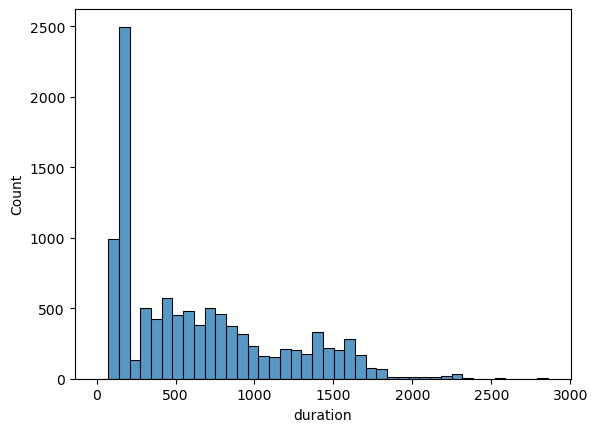

In [136]:
sns.histplot(df.duration)

<Axes: >

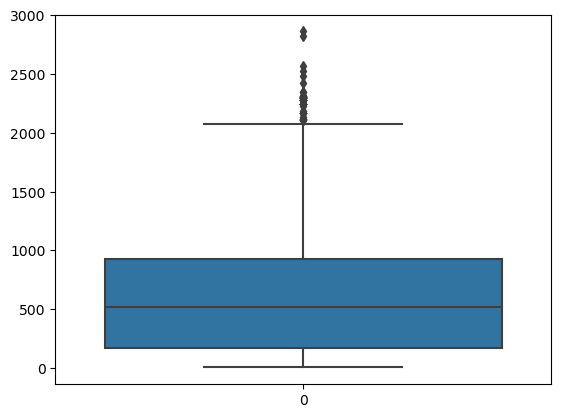

In [137]:
sns.boxplot(df['duration'])

In [138]:
df['Price'].corr(df['duration'])

0.5064368840436483

In [139]:
# My intution was right, duration column is highly correlated with price column
# let us incorporate duration column into our workflow

In [140]:
df['duration'].describe()

count    10681.000000
mean       643.062447
std        507.835402
min          5.000000
25%        170.000000
50%        520.000000
75%        930.000000
max       2860.000000
Name: duration, dtype: float64

In [141]:
df.duration.max()

2860

In [142]:
new_df.iloc[10456] # 47 hour is not reasonable, this data contains outlier. let us cap it.

Airline                      Jet Airways
Date_of_Journey                6/03/2019
Source                             Delhi
Destination                       Cochin
Route              DEL → AMD → BOM → COK
Dep_Time                           19:10
Arrival_Time                18:50 08 Mar
Duration                         47h 40m
Total_Stops                      2 stops
Additional_Info                  No info
Price                              20694
Name: 10456, dtype: object

In [143]:
df[df.duration == 2860]

,Price,journey_date,journey_month,total_stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,duration
10456,20694,6,3,2,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,2860


In [144]:
upper_time_limit = df.duration.mean() + 1.5 * df.duration.std()
upper_time_limit

1404.8155504948618

In [145]:
new_duration = df['duration'].clip(upper = upper_time_limit)

<Axes: xlabel='duration', ylabel='Count'>

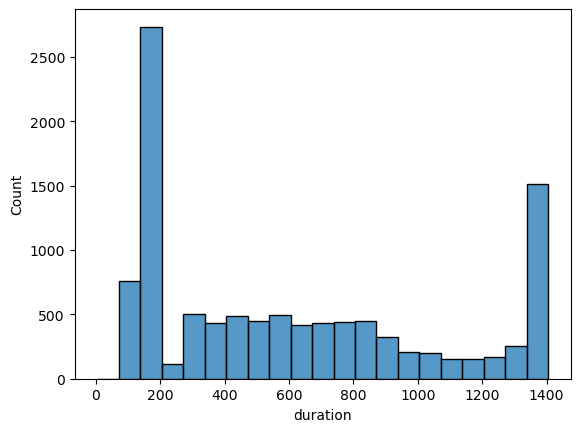

In [146]:
sns.histplot(new_duration)

<Axes: >

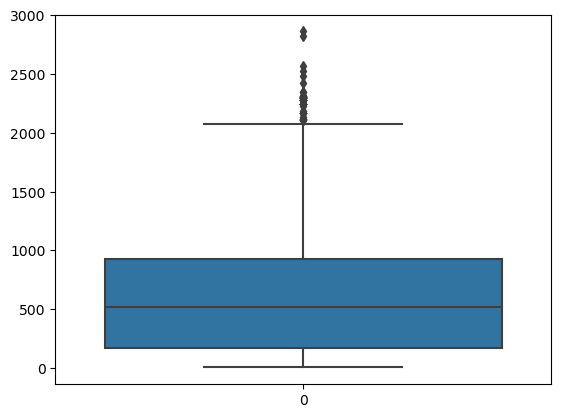

In [147]:
sns.boxplot(df['duration'])

In [148]:
df['Price'].corr(new_duration)

0.529407252311436

In [149]:
df['duration'] = new_duration

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Price                              10681 non-null  int64  
 1   journey_date                       10681 non-null  int32  
 2   journey_month                      10681 non-null  int32  
 3   total_stops                        10681 non-null  int64  
 4   Air India                          10681 non-null  int32  
 5   GoAir                              10681 non-null  int32  
 6   IndiGo                             10681 non-null  int32  
 7   Jet Airways                        10681 non-null  int32  
 8   Jet Airways Business               10681 non-null  int32  
 9   Multiple carriers                  10681 non-null  int32  
 10  Multiple carriers Premium economy  10681 non-null  int32  
 11  SpiceJet                           10681 non-null  int32  


In [151]:
bins = [0, 120, 360, 1440]  # custom bin intervals for 'Short,' 'Medium,' and 'Long'
labels = ['Short', 'Medium', 'Long']

In [152]:
df['Duration_Category'] = pd.cut(df['duration'], bins=bins, labels=labels)

In [153]:
df[['duration', 'Duration_Category']][df['Duration_Category'] == 'Medium'].sample(5)

,duration,Duration_Category
7573,155.0,Medium
2673,330.0,Medium
6121,155.0,Medium
7496,165.0,Medium
8372,280.0,Medium


In [154]:
df['Price'].corr(df['duration'])

0.529407252311436

In [155]:
# encoding duration_category column

duration_map = {'Short':1, 'Medium':2, 'Long': 3}

In [156]:
df['duration_new'] = df['Duration_Category'].map(duration_map)

In [157]:
df['duration_new'].head(5)

0    2
1    3
2    3
3    2
4    2
Name: duration_new, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [158]:
df['duration_new']

0        2
1        3
2        3
3        2
4        2
        ..
10678    2
10679    2
10680    2
10681    2
10682    3
Name: duration_new, Length: 10681, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [159]:
df['Price'].corr(df['duration_new'])

0.6053354852861735

### Now our data is complete for modeling

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Price                              10681 non-null  int64   
 1   journey_date                       10681 non-null  int32   
 2   journey_month                      10681 non-null  int32   
 3   total_stops                        10681 non-null  int64   
 4   Air India                          10681 non-null  int32   
 5   GoAir                              10681 non-null  int32   
 6   IndiGo                             10681 non-null  int32   
 7   Jet Airways                        10681 non-null  int32   
 8   Jet Airways Business               10681 non-null  int32   
 9   Multiple carriers                  10681 non-null  int32   
 10  Multiple carriers Premium economy  10681 non-null  int32   
 11  SpiceJet                           10681 non-n

In [161]:
df.drop(['duration', 'Duration_Category'], axis = 1, inplace = True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Price                              10681 non-null  int64   
 1   journey_date                       10681 non-null  int32   
 2   journey_month                      10681 non-null  int32   
 3   total_stops                        10681 non-null  int64   
 4   Air India                          10681 non-null  int32   
 5   GoAir                              10681 non-null  int32   
 6   IndiGo                             10681 non-null  int32   
 7   Jet Airways                        10681 non-null  int32   
 8   Jet Airways Business               10681 non-null  int32   
 9   Multiple carriers                  10681 non-null  int32   
 10  Multiple carriers Premium economy  10681 non-null  int32   
 11  SpiceJet                           10681 non-n

## Split

In [163]:
X = df.drop('Price', axis = 1)

In [164]:
X.isnull().sum()

journey_date                         0
journey_month                        0
total_stops                          0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                            0
duration_new                         0
dtype: int64

In [165]:
y = df['Price']

In [166]:
#extracting important features using 'ExtraTreesRegressor'

from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X,y)

ExtraTreesRegressor()

In [167]:
#selection_importances_
print(select.feature_importances_)

[1.56155381e-01 5.99836812e-02 1.49845593e-01 8.58800127e-03
 3.06453943e-03 1.53609147e-02 1.27037760e-01 8.18999667e-02
 1.53505396e-02 7.13256067e-04 1.90305122e-03 5.09963270e-03
 1.56834513e-04 4.69244936e-04 7.01446206e-03 3.73319602e-03
 6.36477853e-03 1.08121255e-02 3.88392109e-03 5.28283113e-03
 5.30036716e-04 2.93239138e-02 3.07426338e-01]


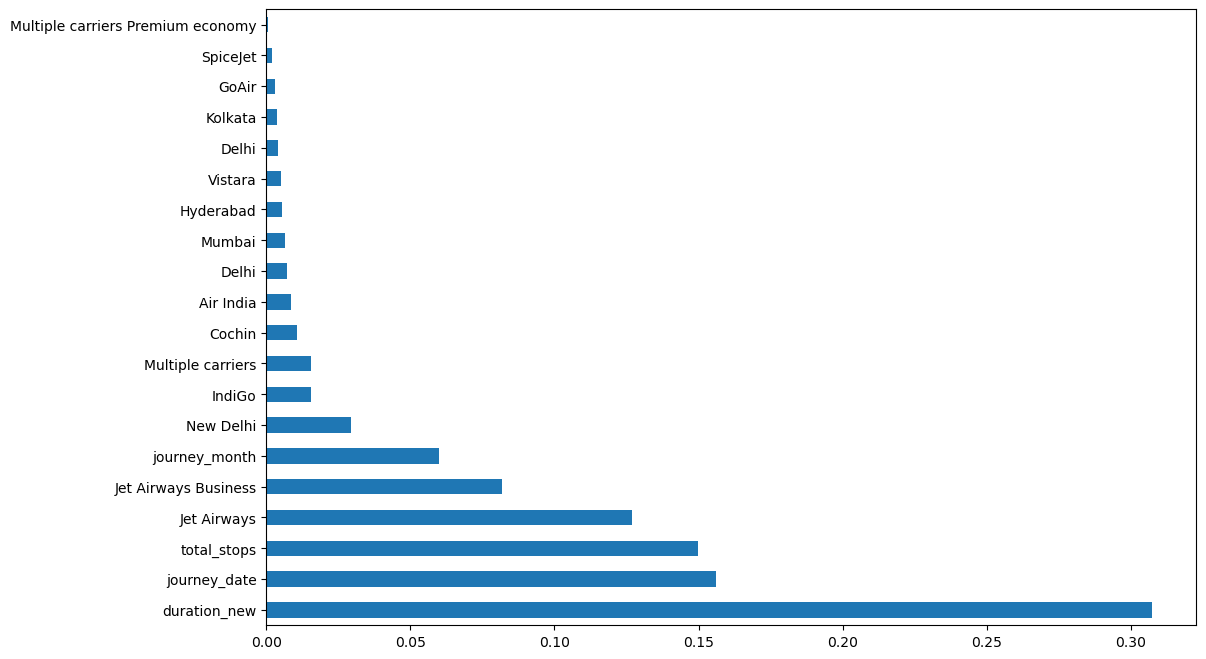

In [209]:
plt.figure(figsize = (12,8))
fig_importances = pd.Series(select.feature_importances_, index=X.columns)
fig_importances.nlargest(20).plot(kind='barh')
plt.savefig('fig_importance_plot.png')  # Save the plot as an image
plt.show()

### modeling

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2, shuffle=True)

In [171]:
model_list = {'Linear_regression':LinearRegression(), 'Elastic_net': ElasticNet(), 'Lasso':Lasso(), 'ridge':Ridge(), 'random_forest':RandomForestRegressor(), 'Gradient_boost': GradientBoostingRegressor(), 'Ada_boost': AdaBoostRegressor(), 'Decision_tree': DecisionTreeRegressor()}

In [172]:
model_score = []

def train_predict(X_train,X_test,y_train,y_test):
    
    global model_list, model_score
    
    for model_name, model_obj in model_list.items():
        model = model_obj.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        r2score = r2_score(y_test, y_pred)

        print(f'{model_name}::\n')
        print('Training_score: ', model.score(X_train,y_train))
        
        print('Test_socre-r2score: ', r2score, '\n' )    
        
        model_score.append({model_name:r2score})
    return model_score

In [173]:
train_predict(X_train, X_test, y_train, y_test)

Linear_regression::

Training_score:  0.6316708758098523
Test_socre-r2score:  0.6213792152428171 

Elastic_net::

Training_score:  0.46213186976520837
Test_socre-r2score:  0.46672123630128304 

Lasso::

Training_score:  0.6314488236159372
Test_socre-r2score:  0.620902915932809 

ridge::

Training_score:  0.6298157427139837
Test_socre-r2score:  0.6203892843973406 

random_forest::

Training_score:  0.8255475300782785
Test_socre-r2score:  0.8029966632626695 

Gradient_boost::

Training_score:  0.7585086133893425
Test_socre-r2score:  0.7639310870691365 

Ada_boost::

Training_score:  0.5120449257605162
Test_socre-r2score:  0.5073119305913321 

Decision_tree::

Training_score:  0.82907509596939
Test_socre-r2score:  0.7792008305920478 



[{'Linear_regression': 0.6213792152428171},
 {'Elastic_net': 0.46672123630128304},
 {'Lasso': 0.620902915932809},
 {'ridge': 0.6203892843973406},
 {'random_forest': 0.8029966632626695},
 {'Gradient_boost': 0.7639310870691365},
 {'Ada_boost': 0.5073119305913321},
 {'Decision_tree': 0.7792008305920478}]

In [174]:
# model_score
best_model = max(model_score, key=lambda x: list(x.values())[0])
best_model

{'random_forest': 0.8029966632626695}

### Applying scaling to the final_data and then using in to model

In [175]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
min_max = MinMaxScaler()

In [176]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = scaler.get_feature_names_out())
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= scaler.get_feature_names_out())

In [177]:
X_train_minmax = pd.DataFrame(min_max.fit_transform(X_train), columns = min_max.get_feature_names_out())
X_test_minmax = pd.DataFrame(min_max.transform(X_test), columns= min_max.get_feature_names_out())

In [178]:
train_predict(X_train_scaled, X_test_scaled , y_train, y_test)

Linear_regression::

Training_score:  0.6316708758098523
Test_socre-r2score:  0.6213792152428173 

Elastic_net::

Training_score:  0.5973727244840261
Test_socre-r2score:  0.5873755683262829 



C:\Users\nancy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.728e+07, tolerance: 1.798e+07
  model = cd_fast.enet_coordinate_descent(


Lasso::

Training_score:  0.6316655304020555
Test_socre-r2score:  0.6213826938030451 

ridge::

Training_score:  0.6316708156408
Test_socre-r2score:  0.6213818939490292 

random_forest::

Training_score:  0.8251923112293308
Test_socre-r2score:  0.8050191961062704 

Gradient_boost::

Training_score:  0.7585086133893425
Test_socre-r2score:  0.7639310870691365 

Ada_boost::

Training_score:  0.4848022966475469
Test_socre-r2score:  0.4782913040640231 

Decision_tree::

Training_score:  0.82907509596939
Test_socre-r2score:  0.7796387923370822 



[{'Linear_regression': 0.6213792152428171},
 {'Elastic_net': 0.46672123630128304},
 {'Lasso': 0.620902915932809},
 {'ridge': 0.6203892843973406},
 {'random_forest': 0.8029966632626695},
 {'Gradient_boost': 0.7639310870691365},
 {'Ada_boost': 0.5073119305913321},
 {'Decision_tree': 0.7792008305920478},
 {'Linear_regression': 0.6213792152428173},
 {'Elastic_net': 0.5873755683262829},
 {'Lasso': 0.6213826938030451},
 {'ridge': 0.6213818939490292},
 {'random_forest': 0.8050191961062704},
 {'Gradient_boost': 0.7639310870691365},
 {'Ada_boost': 0.4782913040640231},
 {'Decision_tree': 0.7796387923370822}]

In [179]:
train_predict(X_train_minmax, X_test_minmax, y_train, y_test)

Linear_regression::

Training_score:  0.6316708758098522
Test_socre-r2score:  0.6213792152428171 

Elastic_net::

Training_score:  0.3176060719548538
Test_socre-r2score:  0.3143421600840617 

Lasso::

Training_score:  0.631449502948233
Test_socre-r2score:  0.6208839877874055 

ridge::

Training_score:  0.6298179061076626
Test_socre-r2score:  0.620400512894717 

random_forest::

Training_score:  0.8263090653637806
Test_socre-r2score:  0.8040249985092426 

Gradient_boost::

Training_score:  0.7585086133893425
Test_socre-r2score:  0.7639310870691366 

Ada_boost::

Training_score:  0.3908056668001829
Test_socre-r2score:  0.40610275206208213 

Decision_tree::

Training_score:  0.82907509596939
Test_socre-r2score:  0.780366233688376 



[{'Linear_regression': 0.6213792152428171},
 {'Elastic_net': 0.46672123630128304},
 {'Lasso': 0.620902915932809},
 {'ridge': 0.6203892843973406},
 {'random_forest': 0.8029966632626695},
 {'Gradient_boost': 0.7639310870691365},
 {'Ada_boost': 0.5073119305913321},
 {'Decision_tree': 0.7792008305920478},
 {'Linear_regression': 0.6213792152428173},
 {'Elastic_net': 0.5873755683262829},
 {'Lasso': 0.6213826938030451},
 {'ridge': 0.6213818939490292},
 {'random_forest': 0.8050191961062704},
 {'Gradient_boost': 0.7639310870691365},
 {'Ada_boost': 0.4782913040640231},
 {'Decision_tree': 0.7796387923370822},
 {'Linear_regression': 0.6213792152428171},
 {'Elastic_net': 0.3143421600840617},
 {'Lasso': 0.6208839877874055},
 {'ridge': 0.620400512894717},
 {'random_forest': 0.8040249985092426},
 {'Gradient_boost': 0.7639310870691366},
 {'Ada_boost': 0.40610275206208213},
 {'Decision_tree': 0.780366233688376}]

In [180]:
for k in model_score:
    for i,j in k.items():
        if i == 'random_forest':
            print(i,j)

random_forest 0.8029966632626695
random_forest 0.8050191961062704
random_forest 0.8040249985092426


### - We can see that our model score increase a little bit by standard scaler while using minmax it decreases score a little bit.

### - This happens because 95% of data contains value 0 or 1. That is why standard scaler or minmax scaler dosen't have much effect. Using these technique or not using will not have much higher impact on our model prediction. 

## - Hyper Parameter-Tuning.

- There are two ways of doing it: a) RandomizedSearchCV , Fast b) GridSearchCV
- assign hyperparameters in form of dictionery
- Fit the model
- Check best paramters and best score

In [181]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [182]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [183]:
rnf = RandomForestRegressor()

In [184]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

rf_random = RandomizedSearchCV(estimator = rnf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [185]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\nancy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nancy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nancy\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\nancy\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\nancy\anaconda3\lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [186]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [187]:
y_prediction = rf_random.predict(X_test)

C:\Users\nancy\AppData\Local\Temp\ipykernel_12880\653982018.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_prediction)


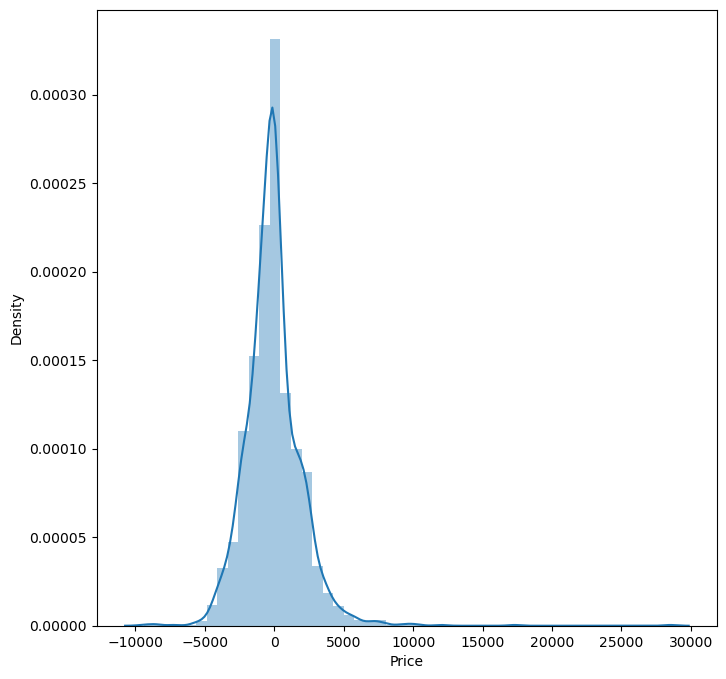

In [188]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_prediction)
plt.show()

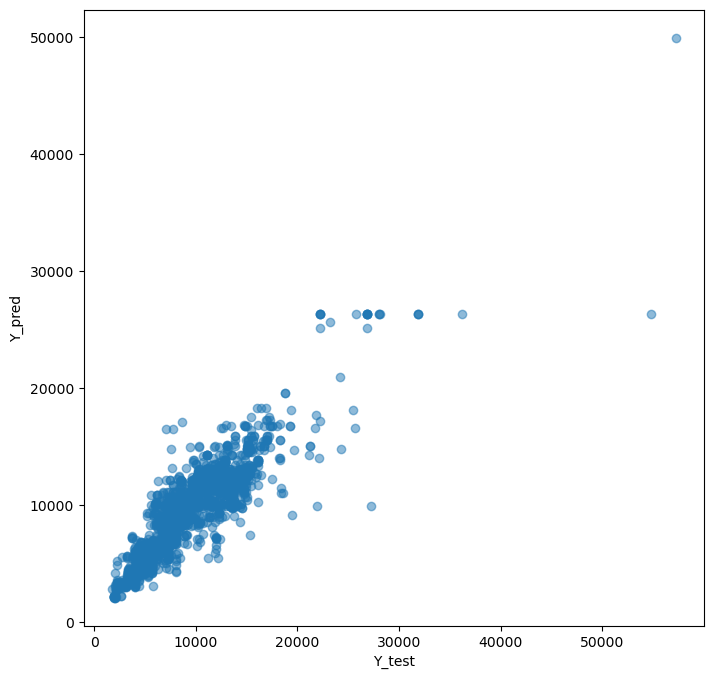

In [189]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [190]:
print('MAE:', mean_absolute_error(y_test, y_prediction))
print('MSE:', mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('R2score:', r2_score(y_test, y_prediction))

MAE: 1403.0543888633806
MSE: 4222836.018229197
RMSE: 2054.9540185194405
R2score: 0.8091887664760244


In [191]:
rnf2 = RandomForestRegressor(n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 25)

In [192]:
rnf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [193]:
y_predict3 = rnf2.predict(X_test)

In [194]:
print('MAE:', mean_absolute_error(y_test, y_predict3))
print('MSE:', mean_squared_error(y_test, y_predict3))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predict3)))
print('R2score:', r2_score(y_test, y_predict3))

MAE: 1386.762379931774
MSE: 4253132.480133286
RMSE: 2062.3124108954216
R2score: 0.8078198037120488


In [195]:
## our best model is :
rnf2.score(X_test, y_test) 

0.8078198037120488

In [196]:
# Now using our test dataset which is unseen from the rest of them.

X_testset = pd.read_csv('test_set.csv')

In [197]:
X_testset.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [198]:
X_testset['Airline'].value_counts()

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

In [199]:
X_testset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [200]:
def convert_to_minutes(duration):
    try:
        hours, minute = 0, 0
        for i in duration.split():
            if 'h' in i:
                hours = int(i[:-1])
            elif 'm' in i:
                minute = int(i[:-1])
        return hours * 60 + minute
    except :
        return None

In [201]:
# Preprocessing of test_set

X_testset['journey_date'] = pd.to_datetime(X_testset['Date_of_Journey'], format ="%d/%m/%Y").dt.day
X_testset['journey_month'] = pd.to_datetime(X_testset['Date_of_Journey'], format ="%d/%m/%Y").dt.month

Xset_stops_map = {'non-stop' : 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
X_testset['total_stops'] = X_testset['Total_Stops'].astype(str).map(stops_map)

X_airline = pd.get_dummies(X_testset['Airline'], drop_first= True, dtype=int)
X_source = pd.get_dummies(X_testset['Source'], drop_first=True, dtype=int)
X_destination = pd.get_dummies(X_testset['Destination'], drop_first=True, dtype=int)

X_testset = pd.concat([X_testset, X_airline, X_source, X_destination], axis = 1)

X_testset['duration'] = X_testset['Duration'].apply(convert_to_minutes)

X_upper_time_limit = X_testset.duration.mean() + 1.5 * X_testset.duration.std()

X_testset['duration'] = X_testset['duration'].clip(upper = X_upper_time_limit)


bins = [0, 120, 360, 1440]  # custom bin intervals for 'Short,' 'Medium,' and 'Long'

labels = ['Short', 'Medium', 'Long']

X_testset['Duration_Category'] = pd.cut(X_testset['duration'], bins=bins, labels=labels)
X_duration_map = {'Short':1, 'Medium':2, 'Long': 3}

X_testset['duration_new'] = X_testset['Duration_Category'].map(X_duration_map)

In [202]:
X_testset.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,duration,Duration_Category,duration_new
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,...,0,0,1,0,0,0,0,655.0,Long,3
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,...,1,0,0,0,0,0,0,240.0,Medium,2


In [203]:
X_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Airline                            2671 non-null   object  
 1   Date_of_Journey                    2671 non-null   object  
 2   Source                             2671 non-null   object  
 3   Destination                        2671 non-null   object  
 4   Route                              2671 non-null   object  
 5   Dep_Time                           2671 non-null   object  
 6   Arrival_Time                       2671 non-null   object  
 7   Duration                           2671 non-null   object  
 8   Total_Stops                        2671 non-null   object  
 9   Additional_Info                    2671 non-null   object  
 10  journey_date                       2671 non-null   int32   
 11  journey_month                      2671 non

In [204]:
X_testset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'journey_date', 'journey_month', 'total_stops',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi',
       'duration', 'Duration_Category', 'duration_new'],
      dtype='object')

In [205]:
cols_to_drop = ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info','duration', 'Duration_Category']

In [206]:
X_testset.drop(cols_to_drop, axis =1, inplace = True)

In [207]:
X_testset.head(1)

,journey_date,journey_month,total_stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,duration_new
0,6,6,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,3


In [ ]:
# pickling our object

In [ ]:
# import joblib 

In [ ]:
# joblib.dump(rnf2, 'random_forest_joblib', compress = ('gzip'))

In [ ]:
# joblib.dump(rf_random, 'random_forest2_joblib', compress = ('gzip'))

In [ ]:
# df.columns

In [ ]:
# cols = ['journey_date', 'journey_month', 'total_stops', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
# 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai',
# 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'duration_new']

In [ ]:
# X.columns

In [ ]:
r2_score(y_test, y_prediction)

In [ ]:
r2_score(y_test, y_predict3)

### we will select rf_random model object to use as a pickle object 

In [ ]:
rf_random.predict([X_test.iloc[0]])

## we will not be using X_testset dataframe which is made from test_set.csv because test_set dosen't have corresponding targert label, this present problem in evaluating the performance. Hence we won't be using it in our final model creation.

In [ ]:
# def convert_to_minutes(duration):
#     try:
#         hours, minute = 0, 0
#         for i in duration.split():
#             if 'h' in i:
#                 hours = int(i[:-1])
#             elif 'm' in i:
#                 minute = int(i[:-1])
#         return hours * 60 + minute
#     except :
#         return None

In [ ]:
# df.head(1)

In [ ]:
# def process(df):
#     # reading the data
#     df.head(2)
    
#     # removing trujet airline
#     df = df[df['Airline'] != 'Trujet']

#     # dropping null values
#     df.dropna(inplace = True)

#     # Date of journey column transformation
#     df['journey_date'] = pd.to_datetime(df['Date_of_Journey'], format ="%d/%m/%Y").dt.day
#     df['journey_month'] = pd.to_datetime(df['Date_of_Journey'], format ="%d/%m/%Y").dt.month

#     # encoding total stops.
#     df.replace({'Total_Stops': {'non-stop' : 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}}, inplace = True)

#     # ecoding airline, source, and destination
#     df_airline = pd.get_dummies(df['Airline'], drop_first= True, dtype=int)
#     df_source = pd.get_dummies(df['Source'], drop_first=True, dtype=int)
#     df_dest = pd.get_dummies(df['Destination'], drop_first=True, dtype=int)

#     df = pd.concat([df, df_airline, df_source, df_dest], axis = 1)

#     # handling duration column
#     df['duration'] = df['Duration'].apply(convert_to_minutes)
#     upper_time_limit = df.duration.mean() + 1.5 * df.duration.std()
#     df['duration'] = df['duration'].clip(upper = upper_time_limit)

#     # encodign duration column
#     bins = [0, 120, 360, 1440]  # custom bin intervals for 'Short,' 'Medium,' and 'Long'
#     labels = ['Short', 'Medium', 'Long'] # creating labels for encoding

#     df['duration'] = pd.cut(df['duration'], bins=bins, labels=labels)
#     df.replace({'duration': {'Short':1, 'Medium':2, 'Long': 3}}, inplace = True)
    
#     # dropping the columns
#     cols_to_drop = ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
#        'Dep_Time', 'Arrival_Time', 'Duration',
#        'Additional_Info']
#     df.drop(cols_to_drop, axis = 1, inplace = True)
    
#     return df

In [ ]:
# df1 = process(df)

In [210]:
import joblib

In [211]:
model = joblib.load('random_forest2_joblib')

In [213]:
X_testset.iloc[0]

journey_date                         6
journey_month                        6
total_stops                          1
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          1
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                1
Kolkata                              0
Mumbai                               0
Cochin                               1
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                            0
duration_new                         3
Name: 0, dtype: int64

In [214]:
model.predict([X_testset.iloc[0]])

C:\Users\nancy\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([12400.72797279])